In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:\kakr-4th-competition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\kakr-4th-competition\sample_submission.csv
C:\kakr-4th-competition\test.csv
C:\kakr-4th-competition\train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

warnings.filterwarnings('ignore')

SEED = 1234

In [3]:
DIR = 'C:\kakr-4th-competition'

In [4]:
train = pd.read_csv(os.path.join(DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DIR, 'test.csv'))

# <span class="girk">목표</span>

링크: <a href="https://www.kaggle.com/c/kakr-4th-competition/overview"><span class="girk"><span class="burk">성인 인구조사 소득 예측 대회</span></span></a>

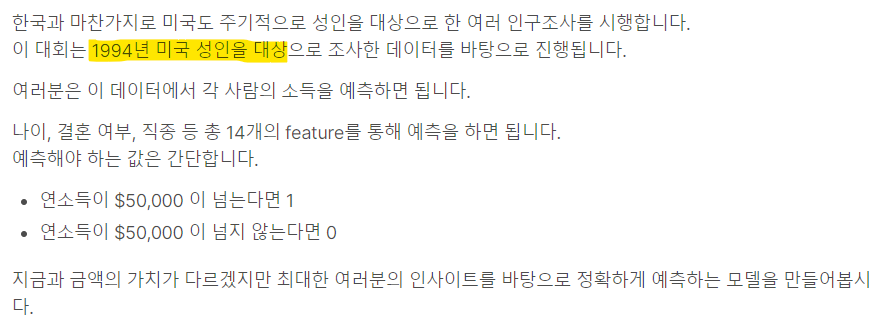

## <span class="girk">특성 정리</span>

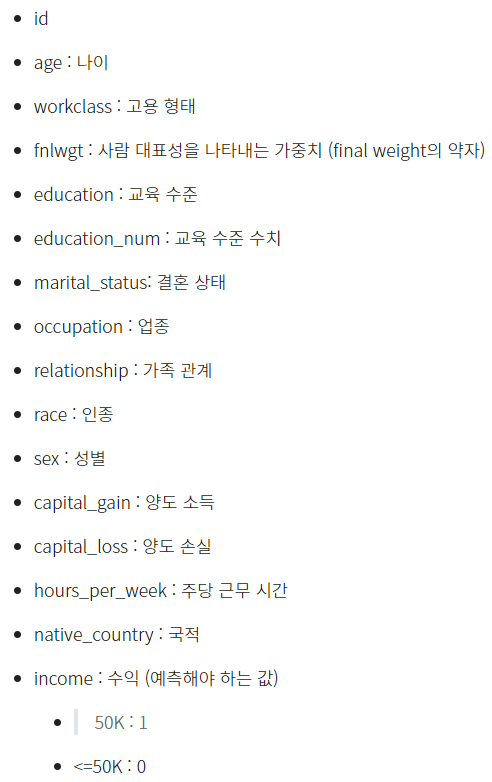

In [5]:
print(train.shape, test.shape)

(26049, 16) (6512, 15)


In [6]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [7]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


## 1. EDA

### 1) 결측치 확인

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.info()

In [ ]:
test.info()

### 2) Target 변환 ('Income')

In [ ]:
train['income'].value_counts()

In [ ]:
train['income'] = train['income'].apply(lambda x: 0 if x == '<=50K' else 1)
train['income'].value_counts()

### 3) train + test 세트 합치기

In [14]:
data = pd.concat([train, test], sort=False)
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1.0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0.0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0.0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0.0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0.0


### <span class="girk">4) Feature Engineering</span>

#### workclass 특성 확인 및 전처리

In [ ]:
data['workclass'].value_counts()

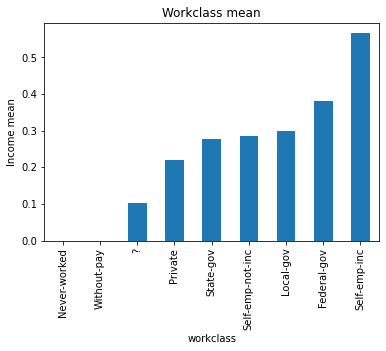

In [16]:
plt.title('Workclass mean')
data.groupby('workclass')['income'].mean().sort_values().plot(ylabel = 'Income mean',kind='bar');

- `Without-Pay` , `Never-worked` 특성의 income은 모두 0
- ∴ 둘다 `Other` 특성으로 바꿔줌

In [ ]:
workclass_other = ['Without-pay', 'Never-worked']

data['workclass'] = data['workclass'].apply(lambda x: 'Other' if x in workclass_other else x)
data['workclass'].value_counts()

#### Age 특성 확인 및 전처리

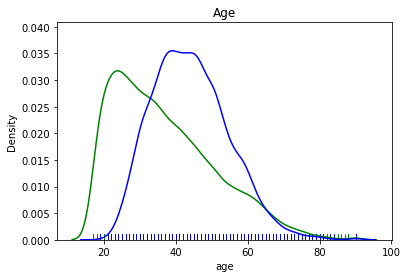

In [18]:
df1 = data.loc[data['income'] == 0, 'age']
df2 = data.loc[data['income'] == 1, 'age']

plt.title('Age')
sns.distplot(df1, kde=True, rug=True, hist=False, color='green', label = 'Less than $50,000')
sns.distplot(df2, kde=True, rug=True, hist=False, color='blue', label = 'More than $50,000');

#### fnlwgt(사람의 대표성을 나타내는 가중치) 특성 확인 및 전처리

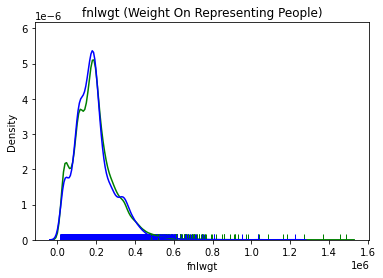

In [19]:
df1 = data.loc[data['income'] == 0, 'fnlwgt']
df2 = data.loc[data['income'] == 1, 'fnlwgt']

plt.title('fnlwgt (Weight On Representing People)')
sns.distplot(df1, kde=True, rug=True, hist=False, color='green')
sns.distplot(df2, kde=True, rug=True, hist=False, color='blue');

income 그룹으로 나누어 확인해 보면, `fnlwgt` 특성의 분포가 거의 차이가 없음

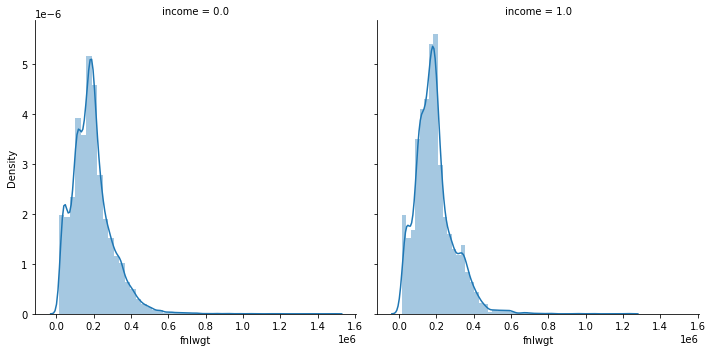

In [20]:
g = sns.FacetGrid(data, col="income", height=5)
g.map(sns.distplot, 'fnlwgt');

- log 를 취해 feature의 variance를 줄이고 정규분포로 만들기
- `최적화 이득!`

In [21]:
data['fnlwgt_log'] = np.log(data['fnlwgt'])

#### education / education_num 특성 전처리

`education` 특성은 `education_num` 특성과 value_counts()가 동일하게 찍히는 것을 알 수 있습니다.

따라서, 두 개의 컬럼 중 한개만 사용!

In [ ]:
data['education'].value_counts()

In [ ]:
data['education_num'].value_counts()

In [ ]:
data.loc[data['education'] == 'Preschool', 'income'].sum()

- Preschool의 value는 모두 0

In [25]:
data.groupby(['education'])['income'].agg(['mean', 'count']).sort_values('mean')

,mean,count
education,,
Preschool,0.000000,40
1st-4th,0.037313,134
5th-6th,0.049057,265
9th,0.052632,418
7th-8th,0.057426,505
11th,0.059653,922
12th,0.072423,359
10th,0.072503,731
HS-grad,0.158544,8433


과적합 방지 위해 단계를 줄임

In [ ]:
education_map = {
    'Preschool': 'Pre', 
    '1st-4th': 'Elementary', 
    '5th-6th': 'Elementary', 
    '7th-8th': 'Middle', 
    '9th': 'Middle', 
    '10th': 'High', 
    '11th': 'High', 
    '12th': 'High', 
    'HS-grad': 'High', 
    'Some-college': 'Univ', 
    'Assoc-acdm': 'Univ_adv', 
    'Assoc-voc': 'Univ_adv', 
    'Bachelors': 'Bachelors', 
    'Masters': 'Masters', 
    'Prof-school': 'Superior', 
    'Doctorate': 'Superior',
}

data['education'] = data['education'].map(education_map)
data['education'].value_counts()

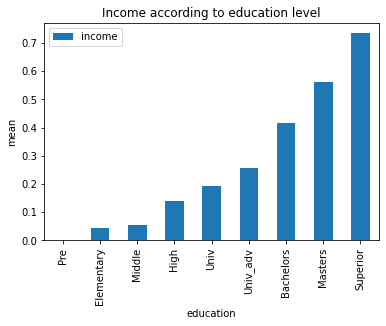

In [27]:
data.pivot_table(index='education', values=['income']).sort_values('income').plot(ylabel = 'mean',title= 'Income according to education level',kind='bar');

- Preschool 의 평균 income = 0
- ∴ 사용안하는 `education_num` drop

In [ ]:
data = data.drop('education_num', 1)
data.columns

#### marital_status 특성 확인 및 전처리

In [ ]:
data['marital_status'].value_counts()

In [30]:
data.pivot_table(index='marital_status', values='income', aggfunc=['mean', 'count'])

,mean,count
,income,income
marital_status,,
Divorced,0.104921,3536
Married-AF-spouse,0.526316,19
Married-civ-spouse,0.448789,11970
Married-spouse-absent,0.080838,334
Never-married,0.046802,8568
Separated,0.065375,826
Widowed,0.087940,796


확인해 보니
`Married-AF-spouse` 특성의 데이터 갯수가 적음

유사 그룹인 `Married-civ-spouse`으로 변형

In [31]:
data.loc[data['marital_status'] == 'Married-AF-spouse', 'marital_status'] = 'Married-civ-spouse'

#### occupation 특성 확인 및 전처리

In [ ]:
data['occupation'].value_counts()

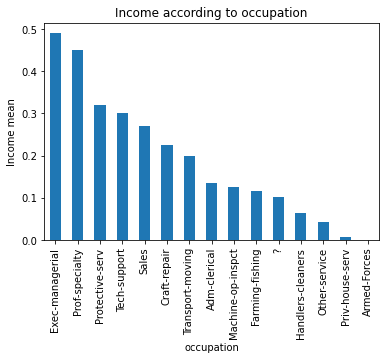

In [33]:
data.groupby('occupation')['income'].mean().sort_values(ascending=False).plot(ylabel= 'Income mean' ,title= 'Income according to occupation', kind='bar');

- `occupation == 'Armed-Forces'`는 모두 income = 0

- 또한, Armed-Forces 역시 데이터 갯수가 적으므로, 과적합 방지를 위하여 Priv-house-serve와 합쳐줌

In [ ]:
data.loc[train['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'income'].value_counts()

In [ ]:
data.loc[data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'
data['occupation'].value_counts()

#### relationship 특성 확인

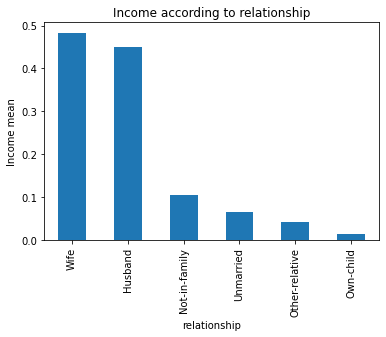

In [36]:
data['relationship'].value_counts()
data.groupby('relationship')['income'].mean().sort_values(ascending=False).plot(ylabel = 'Income mean',title= 'Income according to relationship',kind='bar');

#### race 특성 확인

In [ ]:
data['race'].value_counts()

`race`별 `income`확인

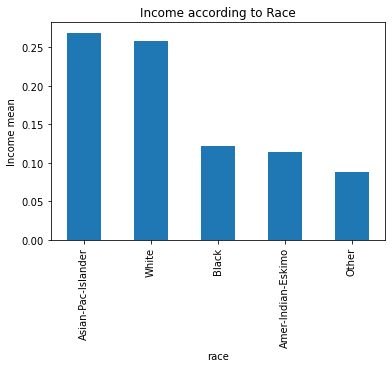

In [38]:
data.groupby('race')['income'].mean().sort_values(ascending=False).plot(title= 'Income according to Race',ylabel = 'Income mean',kind='bar');

#### sex 특성 확인

In [ ]:
data['sex'].value_counts()

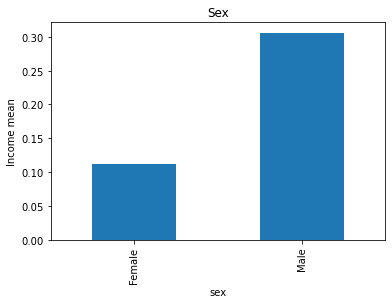

In [40]:
data.groupby('sex')['income'].mean().plot(title= 'Sex' ,ylabel = 'Income mean',kind='bar');

#### capital_gain(양도소득) 특성 확인

`(가설) - capital_gain이 크면 소득 수준이 높지 않을까?`

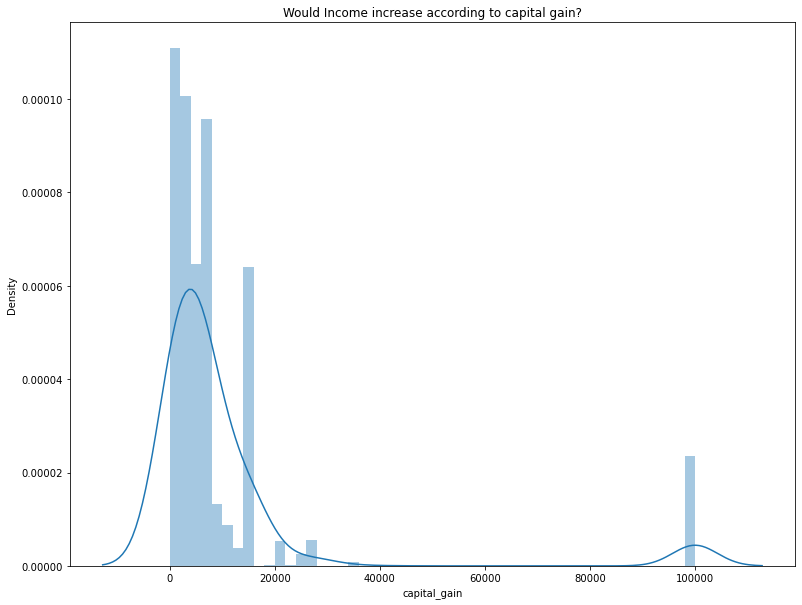

In [41]:
plt.figure(figsize=(13, 10))
plt.title('Would Income increase according to capital gain?')
sns.distplot(data.loc[train['capital_gain'] > 0, 'capital_gain']);

<Figure size 720x504 with 0 Axes>

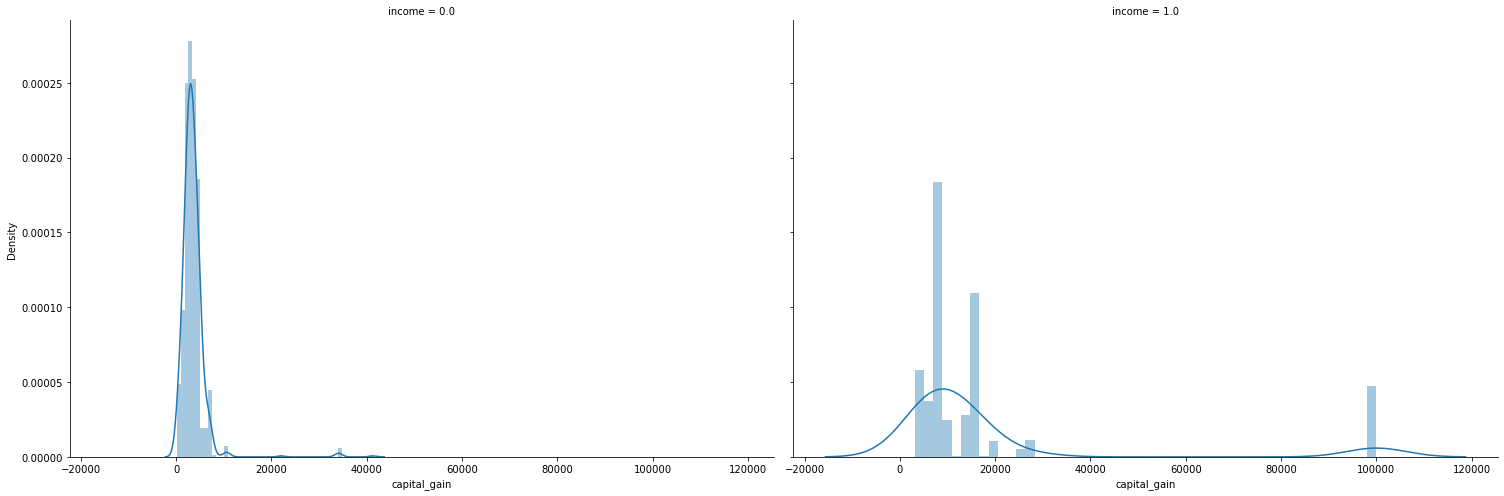

In [42]:
plt.figure(figsize=(10, 7));
g = sns.FacetGrid(data.loc[data['capital_gain']> 0], col="income", height=7, aspect=1.5);
g.map(sns.distplot, 'capital_gain');

<Figure size 1440x720 with 0 Axes>

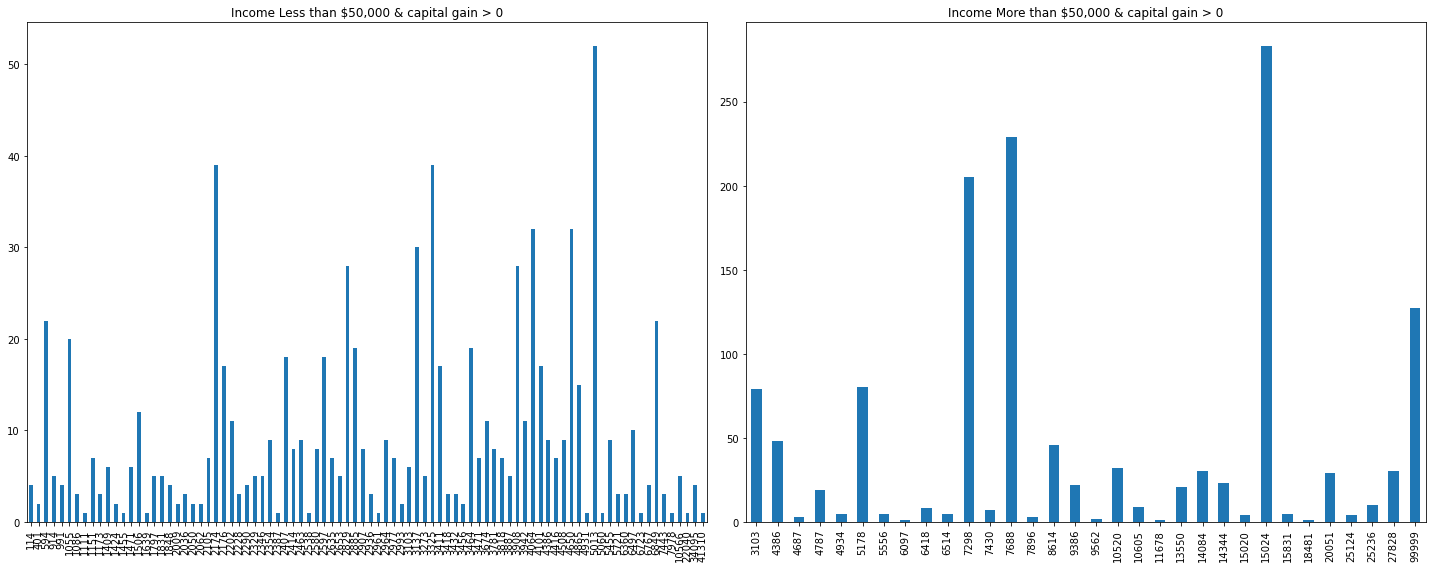

In [43]:
plt.figure(figsize=(20, 10))
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = train.loc[(train['income'] == 0) & (train['capital_gain'] > 0), 'capital_gain'].value_counts().sort_index()
df1.plot(title= 'Income Less than $50,000 & capital gain > 0',kind='bar', ax=axes[0])

df1 = train.loc[(train['income'] == 1) & (train['capital_gain'] > 0), 'capital_gain'].value_counts().sort_index()
df1.plot(title= 'Income More than $50,000 & capital gain > 0',kind='bar', ax=axes[1])

plt.tight_layout()
plt.show();

#### capital_loss(양도손실) 특성 확인

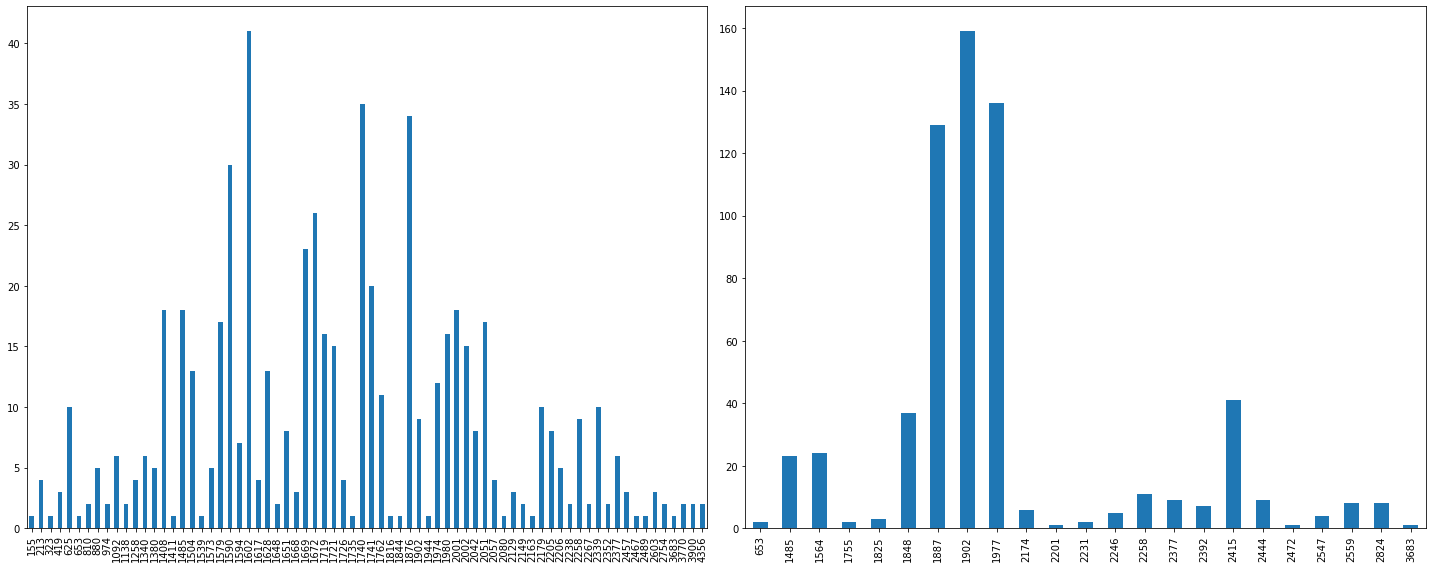

In [44]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = train.loc[(train['income'] == 0) & (train['capital_loss'] > 0), 'capital_loss'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[0])

df1 = train.loc[(train['income'] == 1) & (train['capital_loss'] > 0), 'capital_loss'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[1])

plt.tight_layout()
plt.show()

#### capital_net(순운전자본) 특성 만들기

`capital_net` = `capital_gain` - `capital_loss`

In [45]:
data['capital_net'] = data['capital_gain'] - data['capital_loss']
train['capital_net'] = train['capital_gain'] - train['capital_loss']
test['capital_net'] = test['capital_gain'] - test['capital_loss']

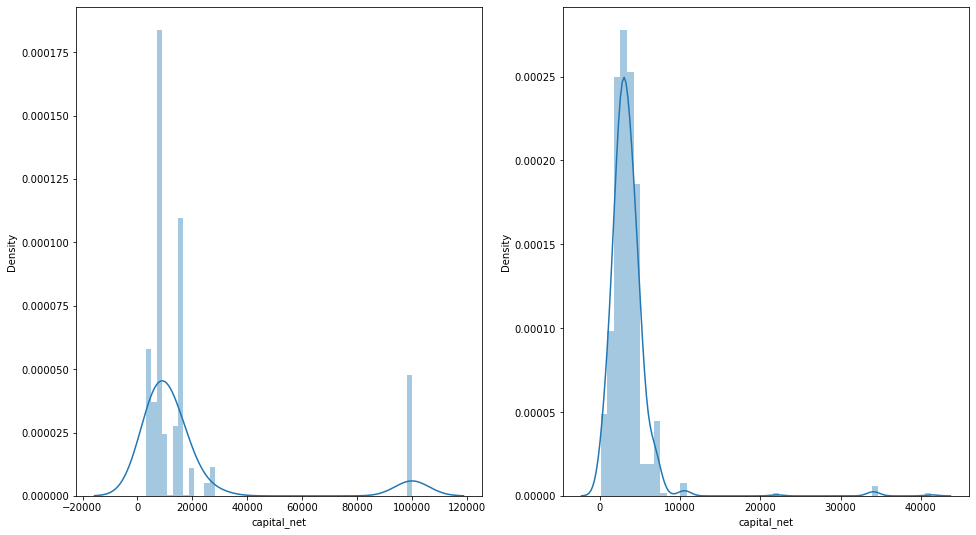

In [46]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.distplot(train.loc[ (train['capital_net'] > 0) & (train['income'] == 1), 'capital_net'])

plt.subplot(1, 2, 2)
sns.distplot(train.loc[ (train['capital_net'] > 0) & (train['income'] == 0), 'capital_net']);

##### capital_net 기준으로 income == 1 or 0 이 나오는 key 값 추출

In [ ]:
pos_key = data.loc[(data['income'] == 1) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key = data.loc[(data['income'] == 1) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key.extend(data.loc[(data['income'] == 0) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist())
all_key[:5]

In [ ]:
df1 = data.loc[(data['income'] == 0) & (data['capital_net'].isin(pos_key)), 'capital_net'].value_counts().sort_index()
df1.plot(kind='bar');

키값 겹침 방지

In [49]:
pos_key = data.loc[(data['income'] == 1) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
neg_key = data.loc[(data['income'] == 0) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()

capital_net_pos_key = [key for key in pos_key if key not in neg_key]
capital_net_neg_key = [key for key in neg_key if key not in pos_key]

data['capital_net_pos_key'] = data['capital_net'].apply(lambda x: x in capital_net_pos_key)
data['capital_net_neg_key'] = data['capital_net'].apply(lambda x: x in capital_net_neg_key)

#### hours_per_week 특성 확인

In [ ]:
data['hours_per_week'].value_counts()

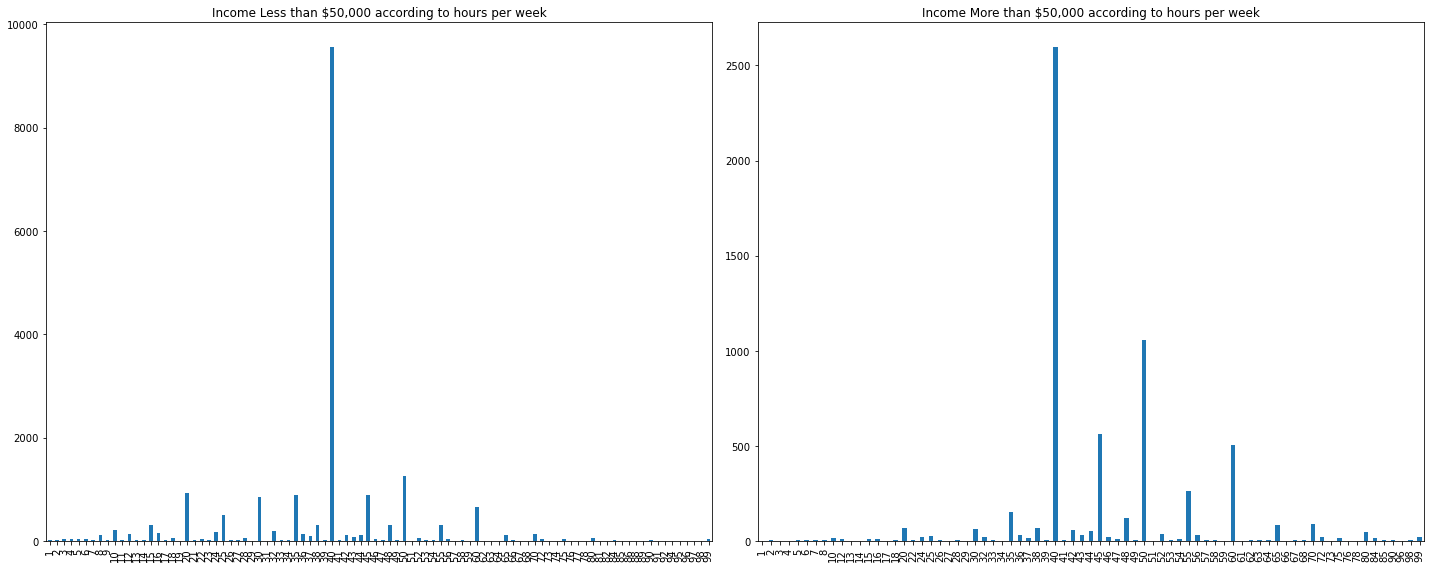

In [51]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = data.loc[(data['income'] == 0), 'hours_per_week'].value_counts().sort_index()
df1.plot(title = 'Income Less than $50,000 according to hours per week',kind='bar', ax=axes[0])

df2 = data.loc[(data['income'] == 1), 'hours_per_week'].value_counts().sort_index()
df2.plot(title ='Income More than $50,000 according to hours per week',kind='bar', ax=axes[1])

plt.tight_layout()
plt.show()

#### native_country 특성 확인 및 전처리

데이터 갯수 별로 없는 나라들은 제거했습니다

In [ ]:
train['native_country'].value_counts().shape, test['native_country'].value_counts().shape

In [ ]:
data['native_country'].value_counts()

<a href="https://countryeconomy.com/gdp?year=1994">GDP - Gross Domestic Product @1994</a> 를 참고하여 Income 그룹을 나눠줌

In [80]:
data.groupby('native_country')['income'].mean().reset_index()

,native_country,income
0,?,0.234649
1,Cambodia,0.428571
2,Canada,0.315217
3,China,0.228070
4,Columbia,0.038462
5,Cuba,0.263158
6,Dominican-Republic,0.041667
7,Ecuador,0.166667
8,El-Salvador,0.088608
9,England,0.343284


In [55]:
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_US = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]

In [ ]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_US:
        return 'income_US'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'
    

data['country_bin'] = data['native_country'].apply(convert_country)
data['country_bin'].value_counts()

## 2. 쓸 Feature 고르기

In [ ]:
data.columns

In [58]:
features = [
#     'id', 
    'age', 
    'workclass', 
#     'fnlwgt', 
    'fnlwgt_log', 
    'education', 
    'marital_status',
    'occupation',
    'relationship', 
    'race',
    'sex',
    'capital_gain',
    'capital_loss', 
    'hours_per_week',
    'native_country',
#     'income',
#     'capital_net', capital_gain과 corr이 커서 제거
    'capital_net_pos_key',
    'capital_net_neg_key',
    'country_bin',
]

label = [
    'income'
]

In [ ]:
data.info()

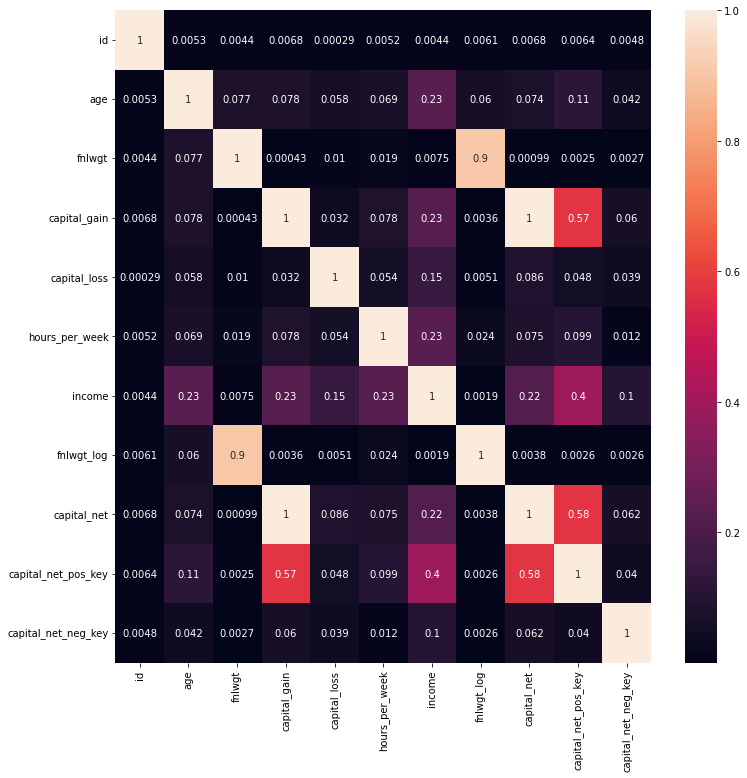

In [60]:
# feature별 상관계수 확인

plt.figure(figsize=(12, 12))
sns.heatmap(abs(data.corr()), annot=True);

In [61]:
data_dummies = pd.get_dummies(data[features + label])
data_dummies.head()

,age,fnlwgt_log,capital_gain,capital_loss,hours_per_week,capital_net_pos_key,capital_net_neg_key,income,workclass_?,workclass_Federal-gov,...,country_bin_income_01,country_bin_income_02,country_bin_income_03,country_bin_income_05,country_bin_income_06,country_bin_income_07,country_bin_income_08,country_bin_income_09,country_bin_income_US,country_bin_income_other
0,40,12.034917,0,0,60,False,False,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17,11.529055,0,0,20,False,False,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,18,12.775237,0,0,16,False,False,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21,11.926081,0,0,25,False,False,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,24,11.713693,0,0,20,False,False,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_features = data_dummies.drop('income', 1).iloc[:len(train)]
test_features = data_dummies.drop('income', 1).iloc[len(test):]

train_label = train[label]
train_features.shape, test_features.shape

## 3. Modeling (XGBRegressor)

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from tqdm import tqdm_notebook

In [64]:
x_train, x_valid, y_train, y_valid = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=SEED)

In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(x_train) #학습 데이터
X_val_encoded = encoder.transform(x_valid) #검증 데이터

pipe = make_pipeline(OrdinalEncoder(),
                    XGBRegressor(
                        n_estimators = 1000,
                        objective = 'reg:squarederror', # default
                        learning_rate = 0.2,
                        n_jobs = -1
))

pipe.get_params

In [ ]:
eval_set = [(X_train_encoded, y_train),
             (X_val_encoded, y_valid)]

pipe.fit(x_train, y_train,
        xgbregressor__eval_set=eval_set,
        xgbregressor__early_stopping_rounds=50
        )

##  <span class="girk">4. Threshold 별 F1 Score 확인</span>

In [67]:
threshold = 0.5
valid_prediction = pipe.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3949
           1       0.78      0.60      0.68      1261

    accuracy                           0.86      5210
   macro avg       0.83      0.78      0.80      5210
weighted avg       0.86      0.86      0.86      5210



### Threshold 별 F1_Score의 변화 확인

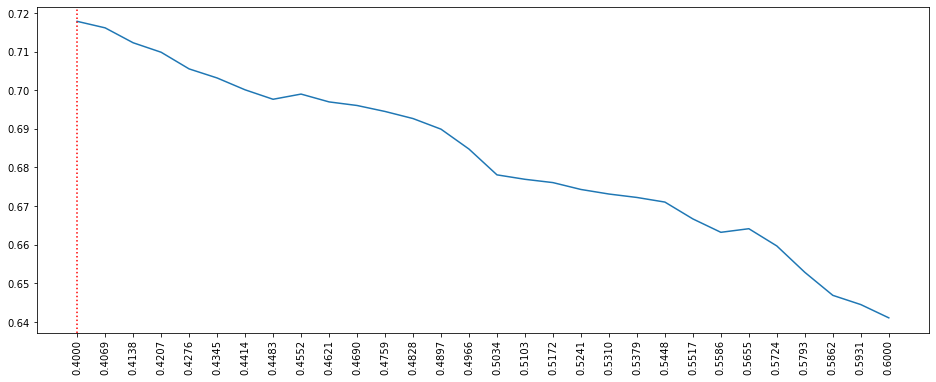

In [68]:
f1_threshold = np.linspace(0.4, 0.6, 30)
f1_scores = []
max_score = 0
max_threshold = 0

for t in f1_threshold:
    valid_prediction = pipe.predict(x_valid)
    valid_prediction[valid_prediction > t] = 1
    valid_prediction[valid_prediction <= t] = 0
    score_ = f1_score(y_valid, valid_prediction)
    f1_scores.append(score_)
    if score_ > max_score:
        max_score = score_
        max_threshold = t
        
plt.figure(figsize=(16, 6))
plt.plot(f1_threshold, f1_scores)
plt.axvline(x=max_threshold, linestyle=':', color='r')
plt.xticks(f1_threshold, rotation=90)
plt.show()

### <span class="mark">confusion_matrix</span>

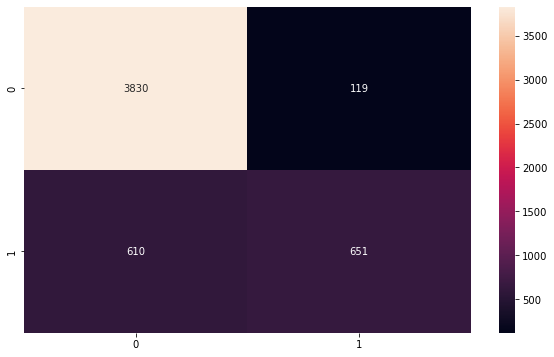

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_valid, valid_prediction), annot=True, fmt='g');

- 11: $50,000 보다 높은 소득을 맞게 예측한 수 (12%)

- 00: $50,000 보다 낮은 소득이 아니지만을 아니다라고 예측한 수 (74%)

## <span class="girk">5. Prediction</span>

### <span class="mark">1) PDP 부분의존그림(Partial dependence plots) 사용</span>

특성 2개 사용

In [ ]:
X_val_encoded.columns

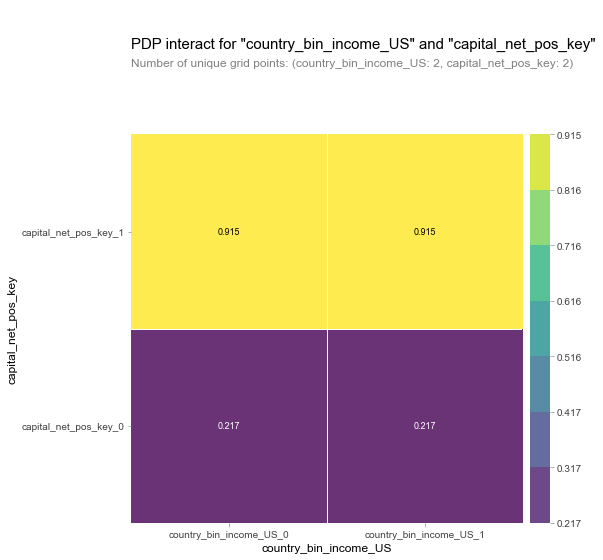

In [71]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['country_bin_income_US', 'capital_net_pos_key']
# country_bin_income_04 = 'United States'
# capital_net_pos_key
# capital_net = capital gain - capital loss
# pos_key = data.loc[(data['income'] == 1) & (data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
# capital_net_pos_key = [key for key in pos_key if key not in neg_key]

interaction = pdp_interact(
    model=pipe, 
    dataset=X_val_encoded,
    model_features=x_valid.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

- country_bin_income_<span class="burk">US_1</span> & capital_net_pos_<span class="burk">key_1</span> : <span class="mark">순운전자본 > 0 & $50,000이상</span>

- country_bin_income_<span class="burk">US_0</span> & capital_net_pos_<span class="burk">key_0</span> : <span class="mark">순운전자본 > 0 & $50,000이하</span>


### <span class="mark">2) 이진 분류</span>
- 0: Less than $50,000

- 1: More than $50,000

Pred 분포 확인

In [ ]:
pred = pipe.predict(test_features)
sns.distplot(pred);

In [ ]:
# Threshold 값 : 0.4069 <- 이떄 f1 score가 max 였으므로
THRESHOLD = 0.4069

print(len(pred[pred >= THRESHOLD]) / len(pred[pred < THRESHOLD]))

In [ ]:
pred[pred >= THRESHOLD] = 1
pred[pred < THRESHOLD] = 0

income_pct = train['income'].value_counts()[1] / train['income'].value_counts()[0]
income_pct

In [75]:
x1 = pred
x1 = pd.DataFrame(pred)

x2 = train['income']
x2 = pd.DataFrame(train['income'])

x2_tr = x2.value_counts()

x1_tr = x1.value_counts()
x1_tr, x2_tr

(0.0    19958
 1.0     6091
 dtype: int64,
 income
 0         19744
 1          6305
 dtype: int64)

In [ ]:
label = ['Less than $50,000', 'More than $50,000']
index = np.arange(len(label))
color = ['blue', 'green']

plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(pred)
plt.title('Annual Income Standard = $50,000')
ax = plt.bar(index, x1_tr, color=color)
plt.xticks(index, label)
plt.xlabel('Prediction')
plt.legend((ax[0], ax[1]), ('Less than $50,000', 'More than $50,000'))

plt.subplot(122)
sns.countplot(train['income'])

plt.title('Annual Income Standard = $50,000')
ax2 = plt.bar(index, x2_tr, color=color)
plt.xticks(index, label)
plt.xlabel('Ac')
plt.legend((ax2[0], ax2[1]), ('Less than $50,000', 'More than $50,000'))
plt.show()

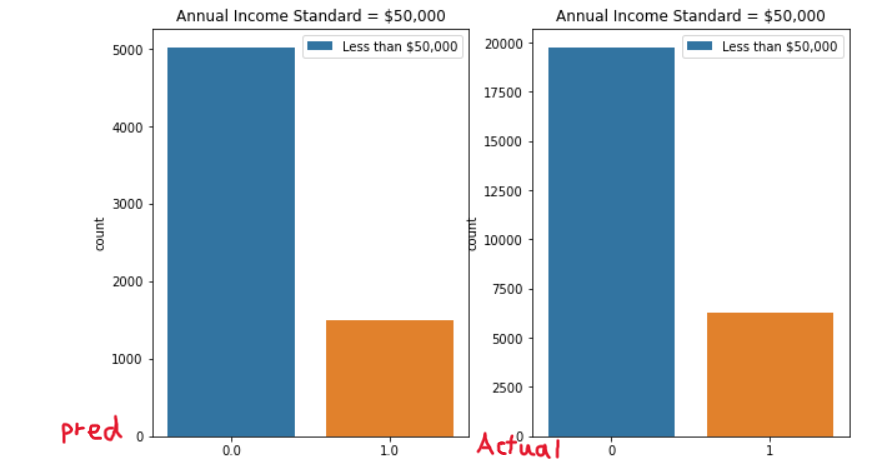